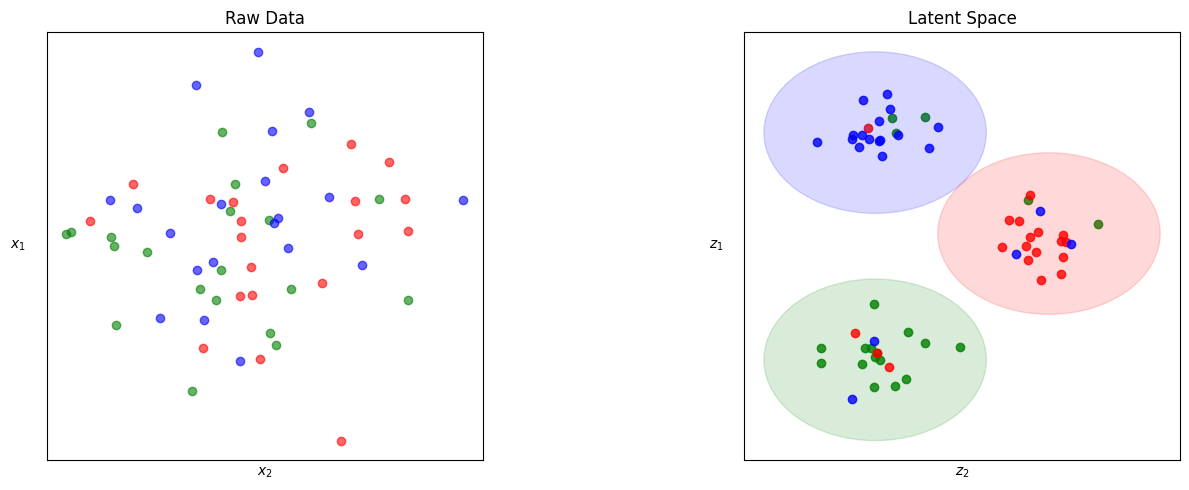

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

np.random.seed(42)
n_points = 20

# Raw data: 3 scattered, overlapping clusters (x1, x2)
raw_centers = np.array([[1, 1], [4, 4], [7, 1]])
raw_data = []
raw_labels = []

for i, center in enumerate(raw_centers):
    points = center + np.random.randn(n_points, 2) * 10.5  # scattered
    raw_data.append(points)
    raw_labels.append(np.full(n_points, i))

raw_data = np.vstack(raw_data)
raw_labels = np.concatenate(raw_labels)

# Introduce clustering mistakes in raw data by swapping labels for a few points
mistake_indices = []
for i in range(3):
    cluster_indices = np.where(raw_labels == i)[0]
    n_mistakes = 3
    chosen = np.random.choice(cluster_indices, n_mistakes, replace=False)
    mistake_indices.extend(chosen)

for idx in mistake_indices:
    original_label = raw_labels[idx]
    new_label = (original_label + 1) % 3
    raw_labels[idx] = new_label

# Latent space: tighter, closer clusters with mistakes
latent_centers = np.array([[0, 0], [5, 5], [9, 0]])
latent_data = []
latent_labels = []

for i, center in enumerate(latent_centers):
    points = center + np.random.randn(n_points, 2) * 0.8
    latent_data.append(points)
    latent_labels.append(np.full(n_points, i))

latent_data = np.vstack(latent_data)
latent_labels = np.concatenate(latent_labels)

# Swap axes for Z2 horizontal

# Bring clusters closer on horizontal axis (Z2)
#latent_data[30:60, 1] -= 1.5
#latent_data[60:90, 1] -= 3.0

# Introduce mistakes in latent labels
latent_mistakes = []
for i in range(3):
    cluster_indices = np.where(latent_labels == i)[0]
    n_mistakes = 3
    chosen = np.random.choice(cluster_indices, n_mistakes, replace=False)
    latent_mistakes.extend(chosen)

for idx in latent_mistakes:
    original_label = latent_labels[idx]
    new_label = (original_label + 1) % 3
    latent_labels[idx] = new_label

latent_mistakes = []
for i in range(2):
    cluster_indices = np.where(latent_labels == i)[0]
    n_mistakes = 2
    chosen = np.random.choice(cluster_indices, n_mistakes, replace=False)
    latent_mistakes.extend(chosen)

for idx in latent_mistakes:
    original_label = latent_labels[idx]
    new_label = (original_label + 2) % 3
    latent_labels[idx] = new_label

latent_mistakes = []
i = 2
cluster_indices = np.where(latent_labels == i)[0]
n_mistakes = 1
chosen = np.random.choice(cluster_indices, n_mistakes, replace=False)
latent_mistakes.extend(chosen)

for idx in latent_mistakes:
    original_label = latent_labels[idx]
    new_label = (original_label + 2) % 3
    latent_labels[idx] = new_label

colors = ['green', 'red', 'blue']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot raw data (x2 horizontal)
for i, color in enumerate(colors):
    subset = raw_data[raw_labels == i]
    axes[0].scatter(subset[:, 1], subset[:, 0], color=color, alpha=0.6)

axes[0].set_title('Raw Data')
axes[0].set_xlabel('$x_2$')
axes[0].set_ylabel('$x_1$', rotation=0, va='center', ha='right', labelpad=15)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].grid(False)

# Plot latent space (Z2 horizontal)
for i, color in enumerate(colors):
    subset = latent_data[latent_labels == i]
    axes[1].scatter(subset[:, 1], subset[:, 0], color=color, alpha=0.8)
    # Add translucent circle around each cluster center (latent centers swapped axes)
    center_x, center_y = latent_centers[i][1], latent_centers[i][0]  # swapped axes
    circle = Circle((center_x, center_y), radius=3.2, color=color, alpha=0.15)
    axes[1].add_patch(circle)

axes[1].set_title('Latent Space')
axes[1].set_xlabel('$z_2$')
axes[1].set_ylabel('$z_1$', rotation=0, va='center', ha='right', labelpad=15)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].grid(False)

plt.tight_layout()
fig.subplots_adjust(wspace=0.6)  # increase horizontal space between plots

plt.show()


In [ ]:
plt.savefig('raw_data.png')
plt.savefig('latent_space.png')


In [1]:
ids_to_names_dict = {
    "1480": "Ilpd",
    "458": "Analcatdata_authorship",
    "469": "Analcatdata_dmft",
    "11": "Balance-scale",
    "23": "Cmc",
    "37": "Diabetes",
    "1067": "Kc1",
    "1063": "Kc2",
    "1068": "Pc1",
    "1050": "Pc3",
    "1049": "Pc4",
    "1464": "Blood-transfusion",
    "40975": "Car",
    "40982": "Steel-plates-fault",
    "1510": "Wdbc",
    "40994": "Climate-model"
}


In [2]:
import os
import json


config_path = "../data/misc/dataset_config.json"   # should contain mapping {dataset_id: {"name": "Dataset Name"}}
input_dir = "../data/preprocessed"
output_dir = "../data/misc"

with open(config_path, "r") as f:
    configs = json.load(f)

dataset_table = []

for dataset_id, _ in configs.items():
    print(f"🔄 Processing dataset {dataset_id}...")

    METADATA_PATH = os.path.join(input_dir, dataset_id, "metadata.json")
    if not os.path.exists(METADATA_PATH):
        print(f"⚠️ No metadata.json found for {dataset_id}, skipping...")
        continue

    with open(METADATA_PATH, "r") as f:
        metadata = json.load(f)

    row = {
        "openml_id": dataset_id,
        "name": ids_to_names_dict[dataset_id],
        "num_samples": metadata["num_samples"],
        "num_features": metadata["num_columns"],
        "num_numerical_features": metadata["num_numerical_features"],
        "num_categorical_features": metadata["num_categorical_features"],
        "num_clusters": metadata["num_clusters"],
        "f_s_ratio": metadata["f_s_ratio"],
    }

    dataset_table.append(row)
    
dataset_table = sorted(dataset_table, key=lambda x: int(x["openml_id"]))
OUTPUT_PATH = os.path.join(output_dir, "dataset_table.json")
with open(OUTPUT_PATH, "w") as f:
    json.dump(dataset_table, f, indent=4)

print(f"✅ Dataset table saved to '{OUTPUT_PATH}'")


🔄 Processing dataset 1480...
🔄 Processing dataset 458...
🔄 Processing dataset 469...
🔄 Processing dataset 11...
🔄 Processing dataset 23...
🔄 Processing dataset 37...
🔄 Processing dataset 1067...
🔄 Processing dataset 1063...
🔄 Processing dataset 1068...
🔄 Processing dataset 1050...
🔄 Processing dataset 1049...
🔄 Processing dataset 1464...
🔄 Processing dataset 40975...
🔄 Processing dataset 40982...
🔄 Processing dataset 1510...
🔄 Processing dataset 40994...
✅ Dataset table saved to '../data/misc\dataset_table.json'


In [3]:
import pandas as pd

# turn into DataFrame
df = pd.DataFrame(dataset_table)

# convert IDs to int for proper sorting
print(df)


   openml_id                    name  num_samples  num_features  \
0         11           Balance-scale          625             4   
1         23                     Cmc         1473            24   
2         37                Diabetes          768             8   
3        458  Analcatdata_authorship          841            81   
4        469        Analcatdata_dmft          797            21   
5       1049                     Pc4         1458            37   
6       1050                     Pc3         1563            37   
7       1063                     Kc2          522            21   
8       1067                     Kc1         2109            21   
9       1068                     Pc1         1109            21   
10      1464       Blood-transfusion          748             4   
11      1480                    Ilpd          583            11   
12      1510                    Wdbc          569            30   
13     40975                     Car         1728            2

In [4]:
import os
import sys
import json
import pandas as pd



cluster_table = {}

for dataset_id, name in ids_to_names_dict.items():
    print(f"🔄 Processing dataset {dataset_id}...")

    metadata_path = os.path.join(input_dir, dataset_id, "metadata.json")
    if not os.path.exists(metadata_path):
        print(f"⚠️ No metadata.json found for {dataset_id}, skipping...")
        continue

    with open(metadata_path, "r") as f:
        metadata = json.load(f)

    # collect cluster distribution
    clusters_path = os.path.join(input_dir, dataset_id, "clusters.csv")
    if os.path.exists(clusters_path):
        df = pd.read_csv(clusters_path)
        col = df.columns[0]
        dist = df[col].value_counts(normalize=True).to_dict()
        dist = {str(k): round(v, 3) for k, v in dist.items()}  # round to 3 digits and stringify keys
        cluster_table[dataset_id] = dist
    else:
        print(f"⚠️ No preprocessed.csv found for {dataset_id}, skipping cluster distribution...")

# sort dataset table by id
cluster_table = {k: cluster_table[k] for k in sorted(cluster_table, key=lambda x: int(x))}

os.makedirs(output_dir, exist_ok=True)

# save cluster distributions (weights)
cluster_path = os.path.join(output_dir, "cluster_distributions.json")
with open(cluster_path, "w") as f:
    json.dump(cluster_table, f, indent=4)

print(f"✅ Saved cluster distributions → {cluster_path}")


🔄 Processing dataset 1480...
🔄 Processing dataset 458...
🔄 Processing dataset 469...
🔄 Processing dataset 11...
🔄 Processing dataset 23...
🔄 Processing dataset 37...
🔄 Processing dataset 1067...
🔄 Processing dataset 1063...
🔄 Processing dataset 1068...
🔄 Processing dataset 1050...
🔄 Processing dataset 1049...
🔄 Processing dataset 1464...
🔄 Processing dataset 40975...
🔄 Processing dataset 40982...
🔄 Processing dataset 1510...
🔄 Processing dataset 40994...
✅ Saved cluster distributions → ../data/misc\cluster_distributions.json


In [5]:
cluster_table

{'11': {'R': 0.461, 'L': 0.461, 'B': 0.078},
 '23': {'1': 0.427, '3': 0.347, '2': 0.226},
 '37': {'tested_negative': 0.651, 'tested_positive': 0.349},
 '458': {'Austen': 0.377,
  'London': 0.352,
  'Shakespeare': 0.206,
  'Milton': 0.065},
 '469': {'Mouthwash': 0.234,
  'Diet_enrichment': 0.2,
  'All_methods': 0.192,
  'Health_education': 0.188,
  'Oral_hygiene': 0.186},
 '1049': {'False': 0.878, 'True': 0.122},
 '1050': {'False': 0.898, 'True': 0.102},
 '1063': {'no': 0.795, 'yes': 0.205},
 '1067': {'False': 0.845, 'True': 0.155},
 '1068': {'False': 0.931, 'True': 0.069},
 '1464': {'1': 0.762, '2': 0.238},
 '1480': {'1': 0.714, '2': 0.286},
 '1510': {'1': 0.627, '2': 0.373},
 '40975': {'unacc': 0.7, 'acc': 0.222, 'good': 0.04, 'vgood': 0.038},
 '40982': {'Other_Faults': 0.347,
  'Bumps': 0.207,
  'K_Scratch': 0.201,
  'Z_Scratch': 0.098,
  'Pastry': 0.081,
  'Stains': 0.037,
  'Dirtiness': 0.028},
 '40994': {'1': 0.915, '0': 0.085}}

In [6]:
# maximum number of clusters across all datasets
max_clusters = max(len(d) for d in cluster_table.values())

rows = []
for dataset_id, dist in cluster_table.items():
    # sort cluster proportions descending
    values = sorted(dist.values(), reverse=True)
    # pad with dashes
    while len(values) < max_clusters:
        values.append("-")
    rows.append([dataset_id] + values)

# create DataFrame
columns = ["dataset_id"] + [f"cluster{i+1}" for i in range(max_clusters)]
df = pd.DataFrame(rows, columns=columns)

# sort by dataset_id numeric
df["dataset_id"] = df["dataset_id"].astype(int)
df = df.sort_values("dataset_id").reset_index(drop=True)

print(df)

    dataset_id  cluster1  cluster2 cluster3 cluster4 cluster5 cluster6  \
0           11     0.461     0.461    0.078        -        -        -   
1           23     0.427     0.347    0.226        -        -        -   
2           37     0.651     0.349        -        -        -        -   
3          458     0.377     0.352    0.206    0.065        -        -   
4          469     0.234     0.200    0.192    0.188    0.186        -   
5         1049     0.878     0.122        -        -        -        -   
6         1050     0.898     0.102        -        -        -        -   
7         1063     0.795     0.205        -        -        -        -   
8         1067     0.845     0.155        -        -        -        -   
9         1068     0.931     0.069        -        -        -        -   
10        1464     0.762     0.238        -        -        -        -   
11        1480     0.714     0.286        -        -        -        -   
12        1510     0.627     0.373    

In [7]:
# save to CSV / JSON
cluster_dist_path = os.path.join(output_dir, "cluster_distribution_table.csv")
df.to_csv(cluster_dist_path, index=False)
